In [56]:
# qubit reset: Analysis of probability ['0'] vs number of resets:       
#This cell has function which can produce circuit of qubit reset, num_reset times
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister,transpile
from qiskit.circuit.classical import expr
def get_qubit_reset(num_resets):
    cr1=ClassicalRegister(1,name="cr1")     # for mid circuit measurement    
    qr=QuantumRegister(1,name="qr")
    qc=QuantumCircuit(qr,cr1)
    qc.h(0)
    for i in range(num_resets):
        
        # mid Circuit Measurement
        qc.measure(qr[0],cr1[0])
        parity= expr.lift(cr1[0])
        #feed forward operation
        with qc.if_test(parity):
            qc.x(qr[0])
    qc.measure(qr[0],cr1[0])               # Final measurement
    return qc

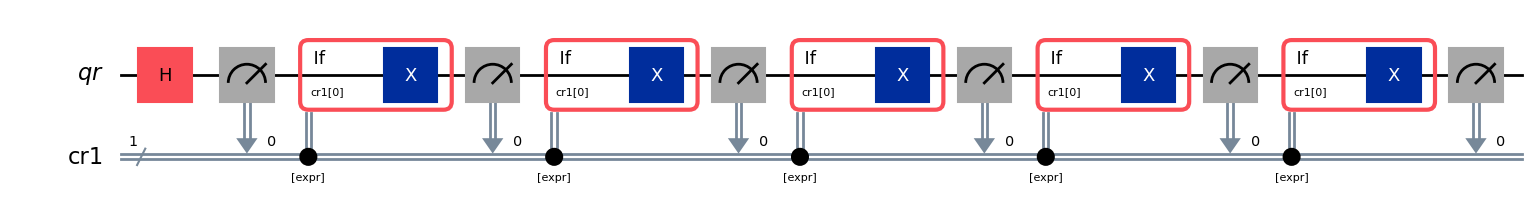

In [57]:
# This cell is for testing whether we succeded in previous cell
qc=get_qubit_reset(5)
qc.draw("mpl")

In [58]:
# ibm_brisbane
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler, QiskitRuntimeService
service = QiskitRuntimeService()
# Specify a system to use for the noise model
real_backend = service.backend("ibm_brisbane")
aer = AerSimulator.from_backend(real_backend)
 
# Run the sampler job locally using AerSimulator.
pm = generate_preset_pass_manager(backend=aer, optimization_level=1)

max_num_reset=10
qc_transpiled_list=[]
num_reset_list=list(range(1,max_num_reset+1))
for num_reset in num_reset_list:
    for i in range(10):                     # for taking 10 copies of each circuit , needed for taking mean, standard deviation of the probability ['0']
        circuit=get_qubit_reset(num_reset)   # However, all 10 outputs will be same (seed is fixed)
        isa_qc = pm.run(circuit)
        qc_transpiled_list.append(isa_qc)
sampler = Sampler(backend=aer)
result = sampler.run(qc_transpiled_list).result()                       # ibm_brisbane

In [61]:
# ibm_sherbrooke
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler, QiskitRuntimeService
service = QiskitRuntimeService()
# Specify a system to use for the noise model
real_backend = service.backend("ibm_sherbrooke")
aer = AerSimulator.from_backend(real_backend)
 
# Run the sampler job locally using AerSimulator.
pm = generate_preset_pass_manager(backend=aer, optimization_level=1)

max_num_reset=10
qc_transpiled_list=[]
num_reset_list=list(range(1,max_num_reset+1))
for num_reset in num_reset_list:
    for i in range(10):                     # for taking 10 copies of each circuit , needed for taking mean, standard deviation of the probability ['0']
        circuit=get_qubit_reset(num_reset)   # However, all 10 outputs will be same (seed is fixed)
        isa_qc = pm.run(circuit)
        qc_transpiled_list.append(isa_qc)
sampler = Sampler(backend=aer)
result2 = sampler.run(qc_transpiled_list).result()                       # ibm_sherbrooke

In [62]:
# ibm_osaka
from qiskit_aer import AerSimulator                      
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler, QiskitRuntimeService
service = QiskitRuntimeService()
# Specify a system to use for the noise model
real_backend = service.backend("ibm_osaka")
aer = AerSimulator.from_backend(real_backend)
 
# Run the sampler job locally using AerSimulator.
pm = generate_preset_pass_manager(backend=aer, optimization_level=1)

max_num_reset=10
qc_transpiled_list=[]
num_reset_list=list(range(1,max_num_reset+1))
for num_reset in num_reset_list:
    for i in range(10):                     # for taking 10 copies of each circuit , needed for taking mean, standard deviation of the probability ['0']
        circuit=get_qubit_reset(num_reset)   # However, all 10 outputs will be same (seed is fixed)
        isa_qc = pm.run(circuit)
        qc_transpiled_list.append(isa_qc)
sampler = Sampler(backend=aer)
result3 = sampler.run(qc_transpiled_list).result()               # ibm_osaka

In [63]:
# ibm_kyoto
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler, QiskitRuntimeService
service = QiskitRuntimeService()
# Specify a system to use for the noise model
real_backend = service.backend("ibm_kyoto")
aer = AerSimulator.from_backend(real_backend)
 
# Run the sampler job locally using AerSimulator.
pm = generate_preset_pass_manager(backend=aer, optimization_level=1)

max_num_reset=10
qc_transpiled_list=[]
num_reset_list=list(range(1,max_num_reset+1))
for num_reset in num_reset_list:
    for i in range(10):                     # for taking 10 copies of each circuit , needed for taking mean, standard deviation of the probability ['0']
        circuit=get_qubit_reset(num_reset)   # However, all 10 outputs will be same (seed is fixed)
        isa_qc = pm.run(circuit)
        qc_transpiled_list.append(isa_qc)
sampler = Sampler(backend=aer)
result4 = sampler.run(qc_transpiled_list).result()                    # ibm_kyoto

In [64]:
# post processing for all 4 hardware simulation results
import matplotlib.pyplot as plt

import statistics
list_std_deviation_prob_zero=[]
list_std_deviation_prob_zero2=[]
list_std_deviation_prob_zero3=[]
list_std_deviation_prob_zero4=[]
list_mean_prob_zero=[]
list_mean_prob_zero2=[]
list_mean_prob_zero3=[]
list_mean_prob_zero4=[]
list_probs=[]                             # we will fill here our probabilities of zero corresponding to number of qubit resets 
list_probs2=[]
list_probs3=[]
list_probs4=[]
for i in range(0,len(num_reset_list)):
    for j in range(10):
        data = result[10*i+j].data  
        data2 = result2[10*i+j].data
        data3 = result3[10*i+j].data
        data4 = result4[10*i+j].data
        counts=data.cr1.get_counts()
        counts2=data2.cr1.get_counts()
        counts3=data3.cr1.get_counts()
        counts4=data4.cr1.get_counts()
        total_counts=data.cr1.num_shots
        total_counts2=data2.cr1.num_shots
        total_counts3=data3.cr1.num_shots
        total_counts4=data4.cr1.num_shots
        prob_zero=(counts['0'])/total_counts
        prob_zero2=(counts2['0'])/total_counts2
        prob_zero3=(counts3['0'])/total_counts3
        prob_zero4=(counts4['0'])/total_counts4
        list_probs.append(prob_zero)
        list_probs2.append(prob_zero2)
        list_probs3.append(prob_zero3)
        list_probs4.append(prob_zero4)
    list_mean_prob_zero.append(statistics.mean(list_probs))
    list_mean_prob_zero2.append(statistics.mean(list_probs2))
    list_mean_prob_zero3.append(statistics.mean(list_probs3))
    list_mean_prob_zero4.append(statistics.mean(list_probs4))
    list_std_deviation_prob_zero.append(statistics.stdev(list_probs))
    list_std_deviation_prob_zero2.append(statistics.stdev(list_probs2))
    list_std_deviation_prob_zero3.append(statistics.stdev(list_probs3))
    list_std_deviation_prob_zero4.append(statistics.stdev(list_probs4))
    list_probs.clear()                                                    # free for next iteration use
    list_probs2.clear() 
    list_probs3.clear() 
    list_probs4.clear() 


<Figure size 640x480 with 0 Axes>

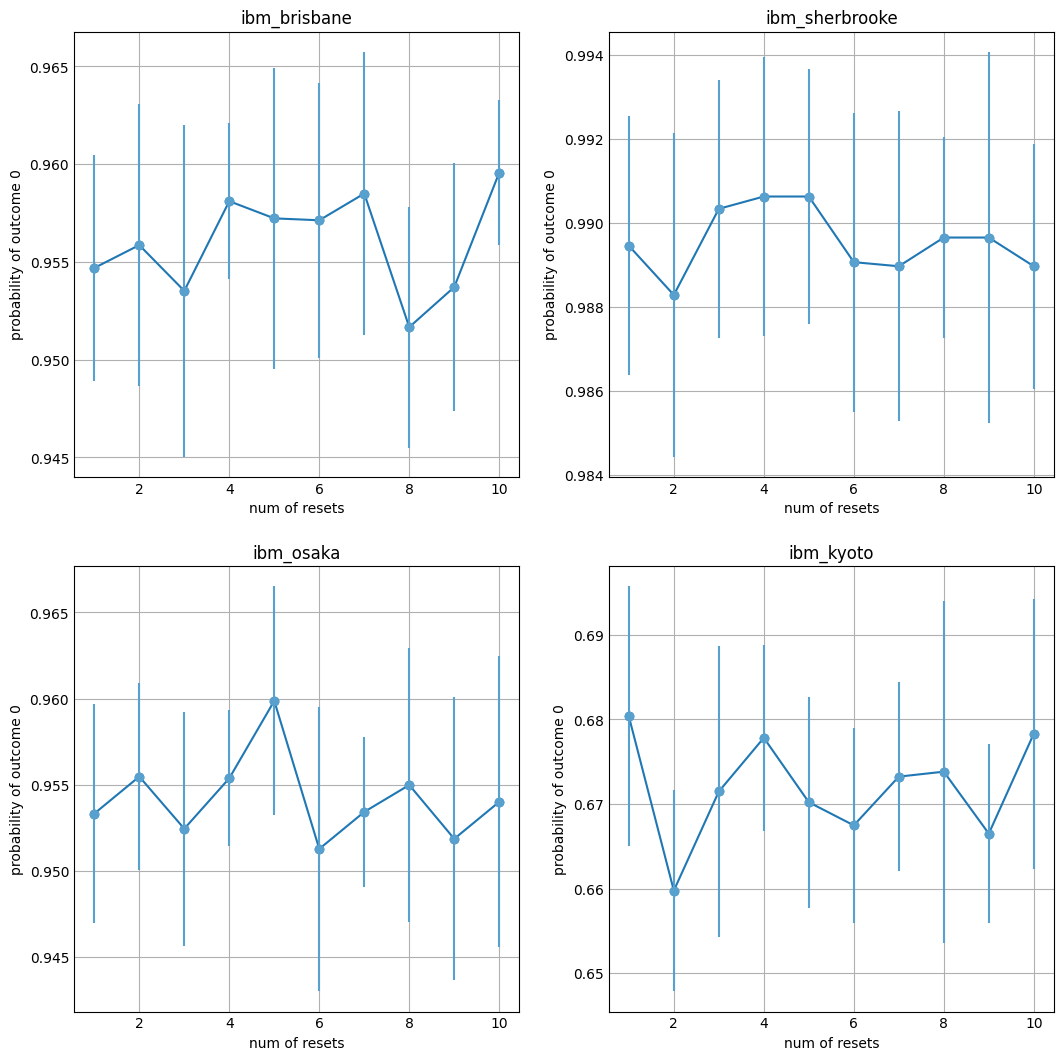

In [72]:
# Plotting Graph
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
#figure(figsize=(16,12), dpi=180)
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(10,10))
# Create  data.
ax1.set_xlabel('num of resets')
ax1.set_ylabel('probability of outcome 0')
ax1.set_title('ibm_brisbane')
x1 = num_reset_list
y1 = list_mean_prob_zero
y_error =list_std_deviation_prob_zero
ax1.plot(x1, y1, 'o-')
ax1.errorbar(x1, y1,
			yerr = y_error, 
			fmt ='o')
ax2.set_xlabel('num of resets')
ax2.set_ylabel('probability of outcome 0')
ax2.set_title('ibm_sherbrooke')
x2 = num_reset_list
y2 = list_mean_prob_zero2
y_error2 =list_std_deviation_prob_zero2
ax2.plot(x2, y2, 'o-')
ax2.errorbar(x2, y2,
			yerr = y_error2, 
			fmt ='o')
ax3.set_xlabel('num of resets')
ax3.set_ylabel('probability of outcome 0')
ax3.set_title('ibm_osaka')
x3 = num_reset_list
y3 = list_mean_prob_zero3
y_error3 =list_std_deviation_prob_zero3
ax3.plot(x3, y3, 'o-')
ax3.errorbar(x3, y3,
			yerr = y_error3, 
			fmt ='o')
ax4.set_xlabel('num of resets')
ax4.set_ylabel('probability of outcome 0')
ax4.set_title('ibm_kyoto')
x4 = num_reset_list
y4 = list_mean_prob_zero4
y_error4 =list_std_deviation_prob_zero4
ax4.plot(x4, y4, 'o-')
ax4.errorbar(x4, y4,
			yerr = y_error4, 
			fmt ='o')
plt.show()